# <hr style="border-bottom: 10px groove black; margin-top: 1px; margin-bottom: 1px"></hr>
# Project Objectives

Document code, process (data acquistion, preparation, exploratory data analysis and statistical testing, modeling, and model evaluation), findings, and key takeaways in a Jupyter Notebook Final Report.

Create modules (wrangle.py) that make your process repeateable and your report (notebook) easier to read and follow.

Ask exploratory questions of your data that will help you understand more about the attributes and drivers of home value. Answer questions through charts and statistical tests.

Construct an classification model that predict programmaning language.

Make recommendations to a data science team about how to improve predictions.

Be prepared to answer panel questions about your code, process, findings and key takeaways, and model.


# Business Goals:

My goal is to find key driver for programmaning language

Construct an classification model that predict programmaning language.

Deliver a report that the data science team can read through and replicate, understand what steps were taken, why and what the outcome was.

Make recommendations on what works or doesn't work in prediction programmaning language.


# Questions:

• Are the mean count_values of Unique Words in Each Language equal to the Population in relation to Non-Repeating Words for the ReadMes?

• Is the distribution of Count of Common words unique to a language a cood indicator of that language (Porportionality)?



# Steps:
1-Data acquistion 

2-Preparation

3-Exploratory data analysis 

4-Modeling 

5-Model evaluation

# <hr style="border-bottom: 10px groove black; margin-top: 1px; margin-bottom: 1px"></hr>

In [1]:
from final_exploration import *

# 1)Acquired:

In [2]:
#acquiring the data with pickle
df=pd.read_pickle('prepared.pkl')

# Takeaways:

# 2)Prepared:

In [3]:
#preparing the dataframe 
df=prepare_df(df)

In [4]:
#splitting up the data to train,val,test
train, validate, test= train_validate_test_split(df)

In [5]:
#shapes
train.shape,validate.shape,test.shape

((5339, 35), (2289, 35), (1908, 35))

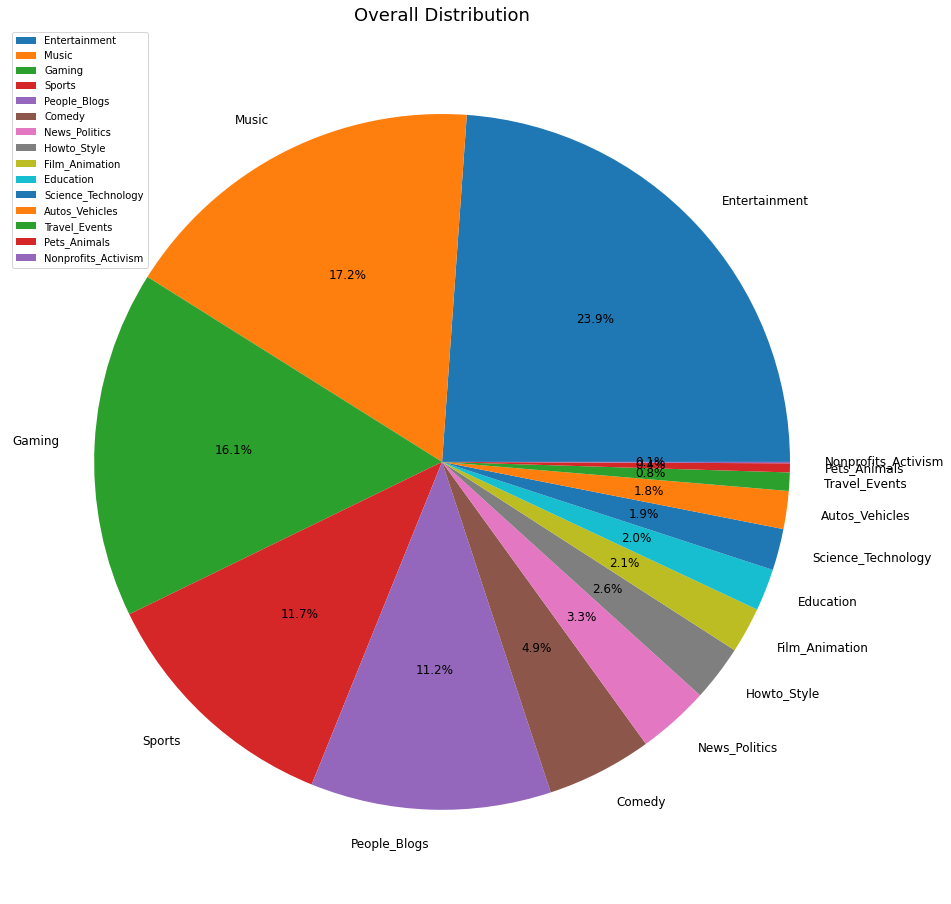

In [6]:
#overall distribution of all category from the dataframe 
category_views(df)

# Dictianary 
# Data Dictionary
|       Target             |           Datatype       |     Definition      |
|:-------------------------|:------------------------:|-------------------:|  
Language              | 487 non-null  String   |   Classifier for Language

|       Feature            |           Datatype       |     Definition      |
|:------------------|:------------------:|--------------:|  
|repo                          |487 non-null    object| Name of the repo contents are found in at GITHUB  |
|language                      |487 non-null    object| The primary language the REPO was written in   |
|readme_contents               |487 non-null    object| Contents of the README  |
|clean                         |487 non-null    object| a tokenized, regex'd, simple cleaned return of the README  |
|stemmed                       |487 non-null    object| Stemmed version of the README  |
|lemmatized                    |487 non-null    object| Lemmatized version of the README  |
|clean_lang                    |487 non-null    object| Remap of the Language feature moving the lower percentile languages into `other`  |
|count_set_lem                 |487 non-null    int64 | count of non-repeating words in the lemmatized repo  |
|count_most_common_JavaScript  |487 non-null    object| count of words that match for Common Unique Words for Language `Javascript` |
|count_most_common_Python      |487 non-null    object| count of words that match for Common Unique Words for Language `Python` |
|count_most_common_Java        |487 non-null    object| count of words that match for Common Unique Words for Language `Java` |
|count_most_common_HTML        |487 non-null    object| count of words that match for Common Unique Words for Language `HTML` |
|count_most_common_Other       |487 non-null    object| count of words that match for Common Unique Words for Language `Other` |
|count_most_common_Ruby        |487 non-null    object| count of words that match for Common Unique Words for Language `Ruby` |

# 3)Exploration:

# Hypotheses:

`Hypotheses1:`Are disable comments optaining more views the none disable comments:

- `H0-`Disable comments optain more views then not disable 

- `Ha-`non disabled comments get more views then disable comments

`Hypotheses2:`Does comment value and views have a corralantioin together??

- `H0-`Comments and view have a high corralations

- `Ha-`Comments and views dont have high corraltions 

`Hypotheses3:`Does the category effect the amount of like receive from the video?

- `H0`- Category effect amount of likes

- `Ha`- Category doesnt effect amount of like received

`Hypotheses4:`What is the most frequent occuring bigrams per category 

`Hypotheses5:`Total count of words per category,Does category effect total amount of words??


`Hypotheses6:`Are some region more active then others??? for example likes/views

# `Hypotheses1:`Are disable comments optaining more views the none disable comments:

`H0-`Disable comments optain more views then not disable 

`Ha-`non disabled comments get more views then disable comments

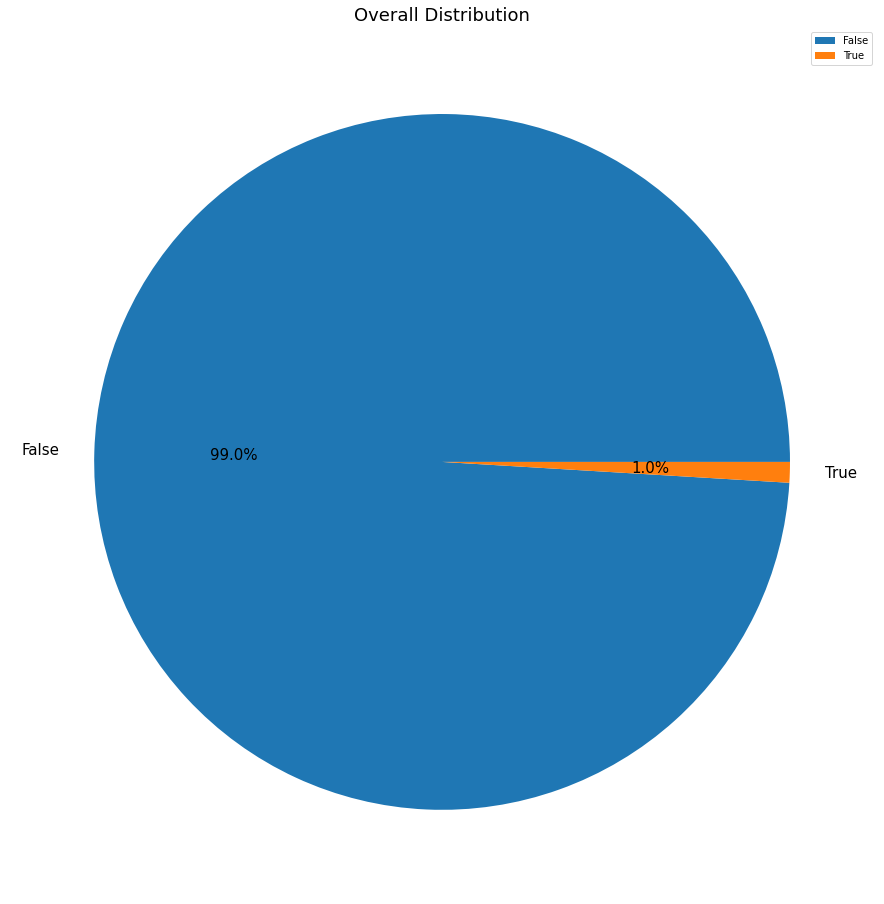

In [7]:
disable_comments(train)

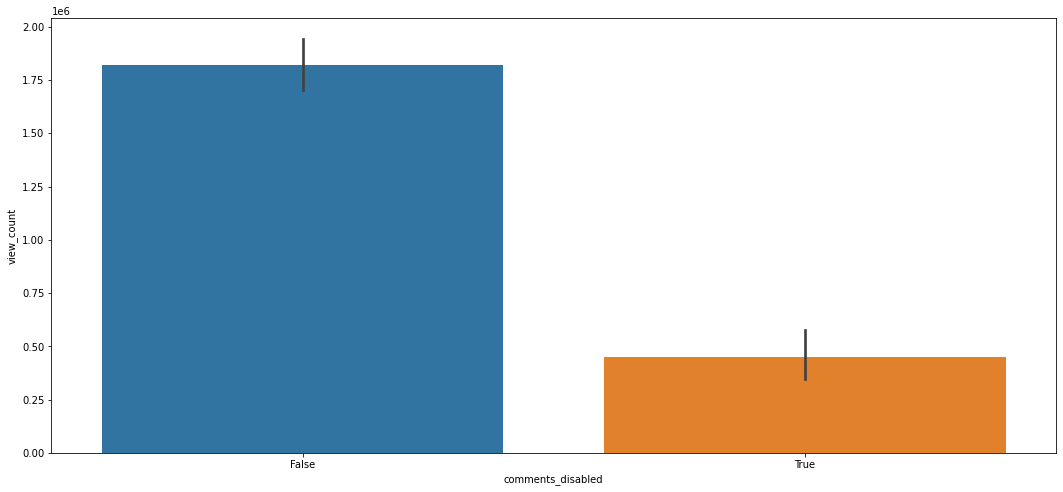

In [8]:
disable_comments2(train)

In [9]:
#stats test anova:needed
comments_stats(train)

We reject the null hypothesis
We can say that we have confidence that comments_disabled is related to view_count


# Takeaways:
    
- Non disable comments take up about 99 percent of the total comment

- Even tho disable comments take up alot more the gap on views isn't as great as we would've thought 


# `Hypotheses2:`Does comment value and views have a corralantioin together??

`H0-`Comments and view have a high corralations

`Ha-`Comments and views dont have high corraltions 

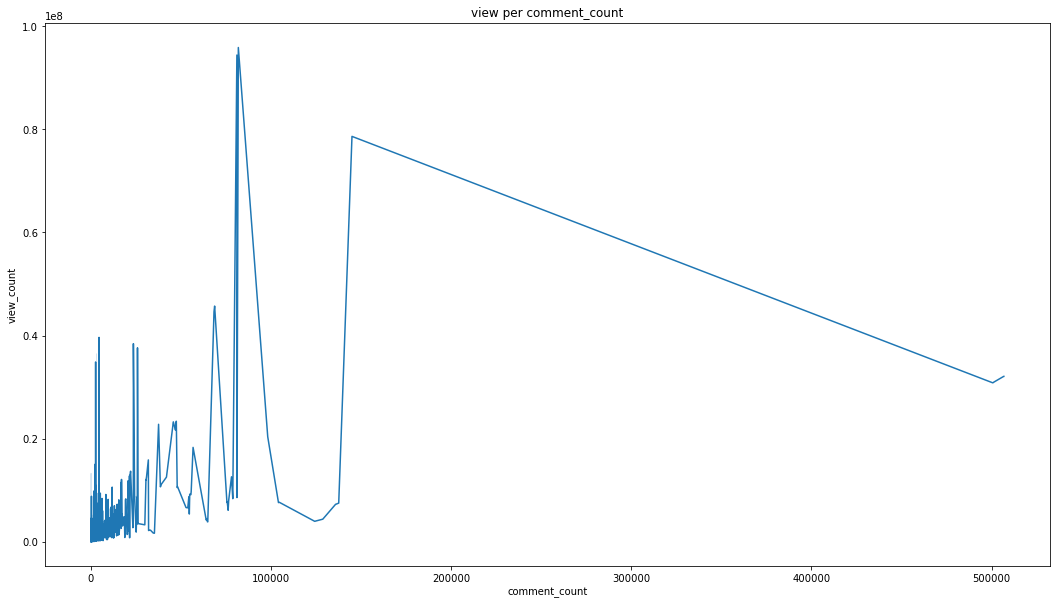

In [10]:
comments_views(train)

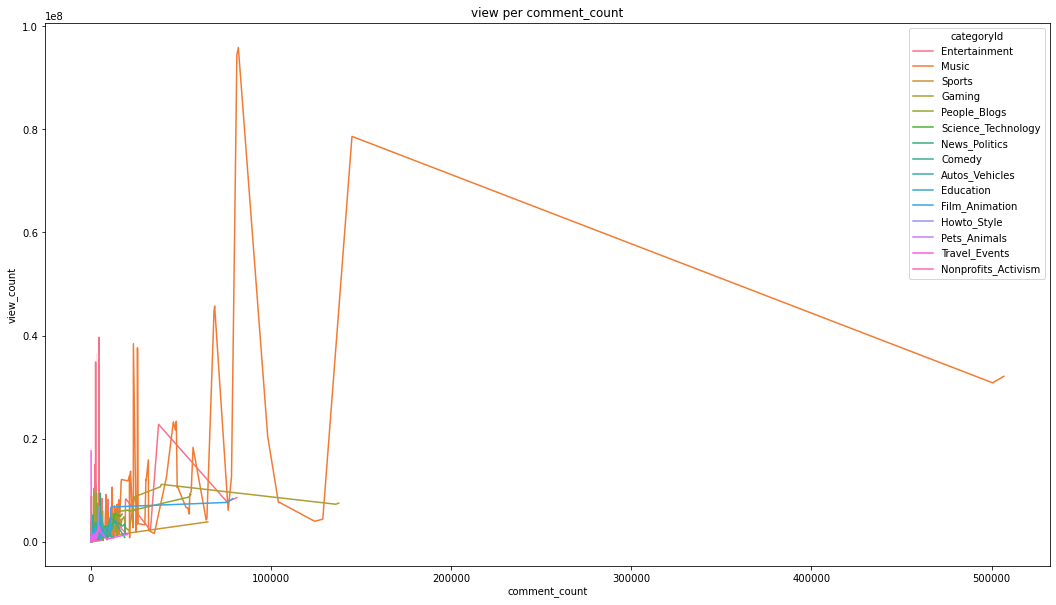

In [11]:
comments_views2(train)

In [12]:
comments_stats2(train)

We reject the null hypothesis
We can say that we have confidence that comment_count is related to view_count


# Takeaways:
    
- Entertainment has the highest view/comment count

- Look like most videos dont get past the 100k comment count but 2

- 25k seem to be the average comment count 

# `Hypotheses3:`Does the category effect the amount of like receive from the video?

- `H0`- Category effect amount of likes

- `Ha`- Category doesnt effect amount of like received

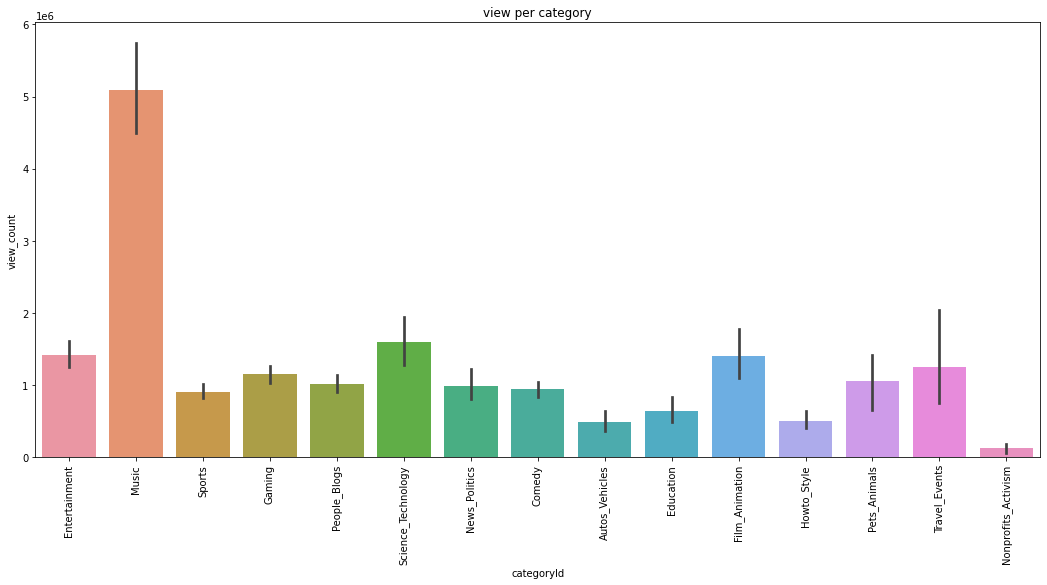

In [13]:
category_views2(train)

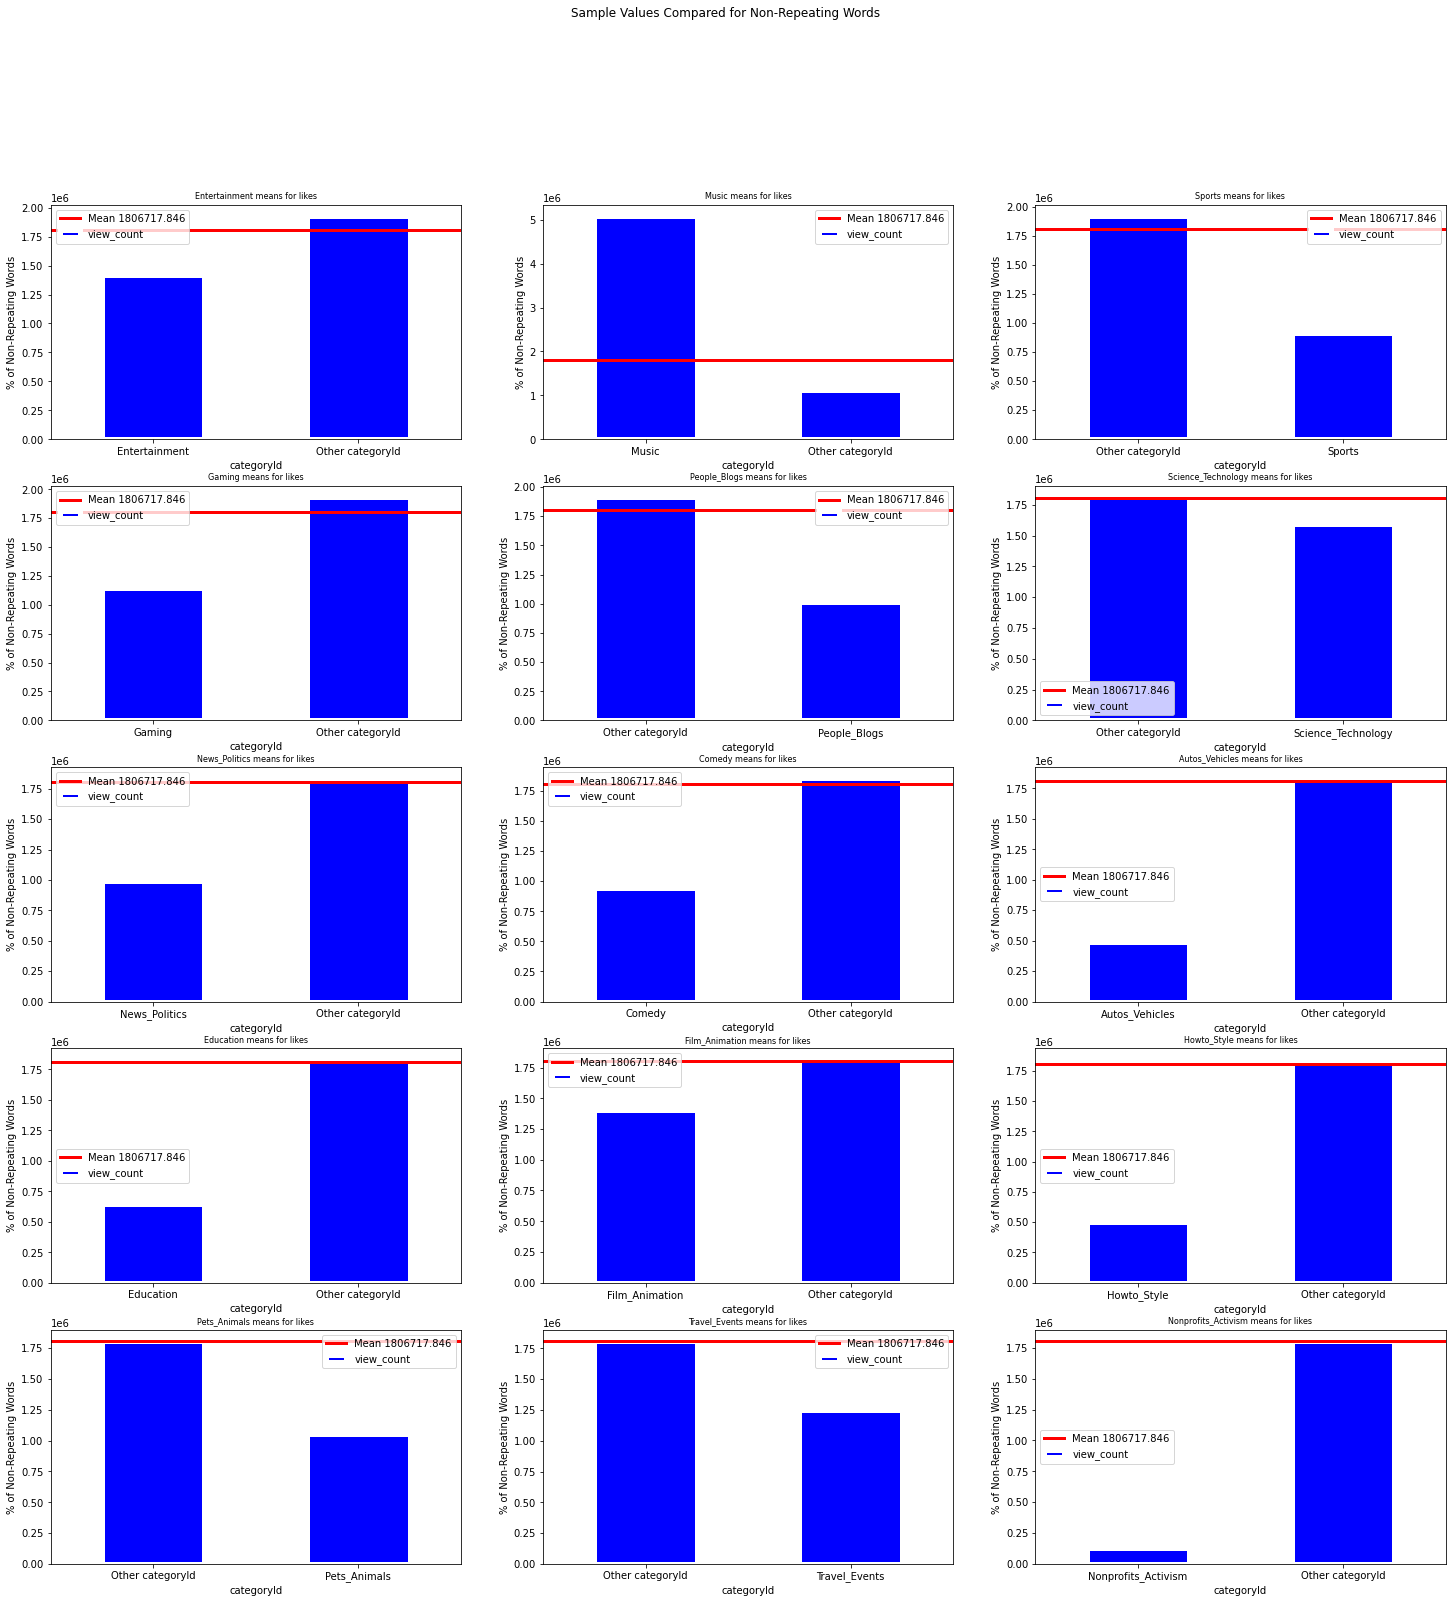

view_count <-target | categoryId <-population name | Entertainment <-sample name
We reject the null Hypothesis ( E̶n̶t̶e̶r̶t̶a̶i̶n̶m̶e̶n̶t̶ ̶a̶s̶ ̶a̶ ̶s̶a̶m̶p̶l̶e̶ ̶h̶a̶s̶ ̶e̶q̶u̶a̶l̶ ̶m̶e̶a̶n̶ ̶v̶a̶l̶u̶e̶s̶ ̶t̶o̶ ̶c̶a̶t̶e̶g̶o̶r̶y̶I̶d̶ ̶a̶s̶ ̶a̶ ̶p̶o̶p̶u̶l̶a̶t̶i̶o̶n̶ ̶r̶e̶g̶a̶r̶d̶i̶n̶g̶ ̶l̶i̶k̶e̶s̶ ) t=-4.18459, p=0.00003
----------
view_count <-target | categoryId <-population name | Music <-sample name
We reject the null Hypothesis ( M̶u̶s̶i̶c̶ ̶a̶s̶ ̶a̶ ̶s̶a̶m̶p̶l̶e̶ ̶h̶a̶s̶ ̶e̶q̶u̶a̶l̶ ̶m̶e̶a̶n̶ ̶v̶a̶l̶u̶e̶s̶ ̶t̶o̶ ̶c̶a̶t̶e̶g̶o̶r̶y̶I̶d̶ ̶a̶s̶ ̶a̶ ̶p̶o̶p̶u̶l̶a̶t̶i̶o̶n̶ ̶r̶e̶g̶a̶r̶d̶i̶n̶g̶ ̶l̶i̶k̶e̶s̶ ) t=10.49641, p=0.00000
----------
view_count <-target | categoryId <-population name | Sports <-sample name
We reject the null Hypothesis ( S̶p̶o̶r̶t̶s̶ ̶a̶s̶ ̶a̶ ̶s̶a̶m̶p̶l̶e̶ ̶h̶a̶s̶ ̶e̶q̶u̶a̶l̶ ̶m̶e̶a̶n̶ ̶v̶a̶l̶u̶e̶s̶ ̶t̶o̶ ̶c̶a̶t̶e̶g̶o̶r̶y̶I̶d̶ ̶a̶s̶ ̶a̶ ̶p̶o̶p̶u̶l̶a̶t̶i̶o̶n̶ ̶r̶e̶g̶a̶r̶d̶i̶n̶g̶ ̶l̶i̶k̶e̶s̶ ) t=-18.18962, p=0.00000
----------
view_count <-target | categoryId <-popu

In [14]:
category_views3(train)

# Takeaways:
- Music and Entertainment are the highest liked

- Sport,new politics,and non profits are the lowest liked

# `Hypotheses4:`What is the most frequent occuring bigrams per category 

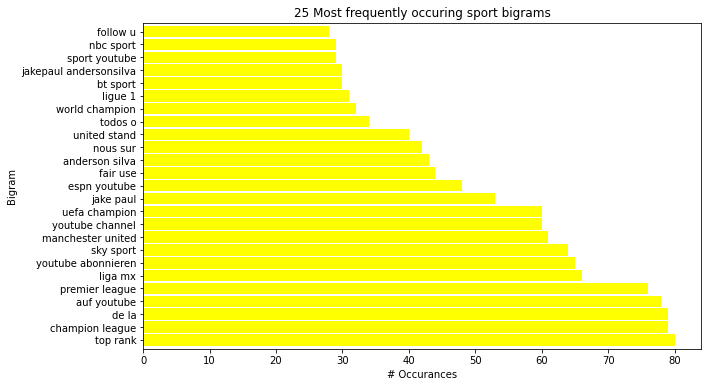

In [15]:
sport_biograms(train)

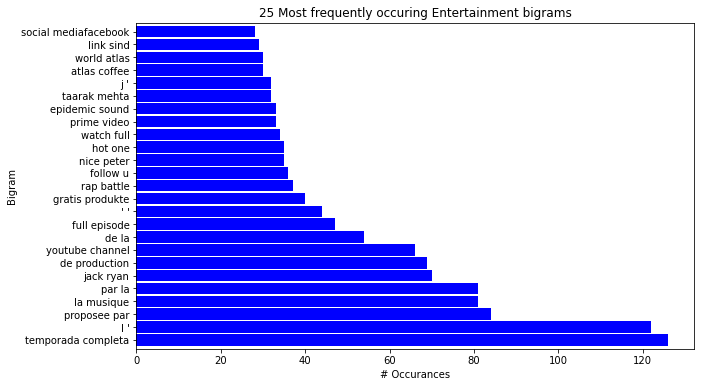

In [16]:
entertainment_biograms(train)

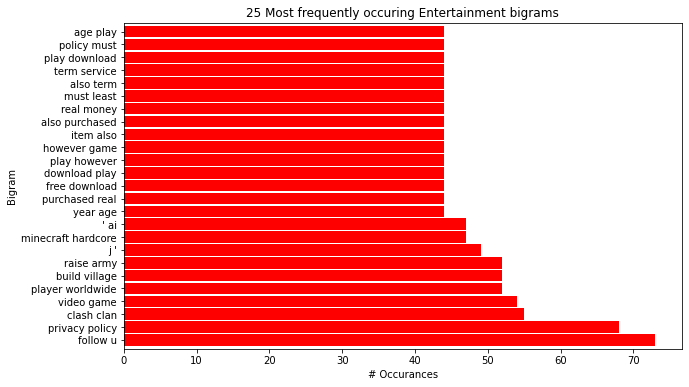

In [17]:
gaming_biograms(train)

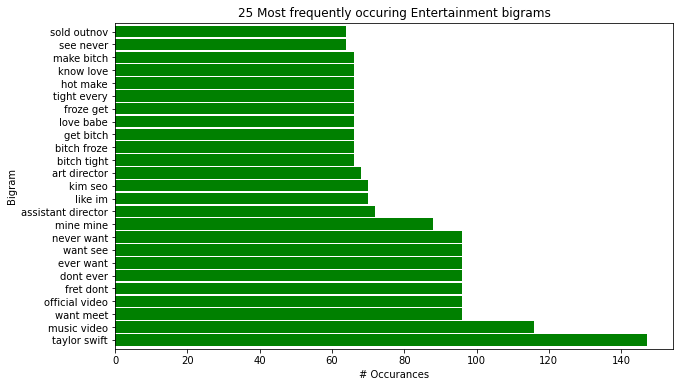

In [18]:
Music_biograms(train)

# Takeaways:
    
- no really take aways from this beside taylor swift always being popular in music and clash of clan always being popular for years 

# `Hypotheses5:`Total count of words per category,Does category effect total amount of words??

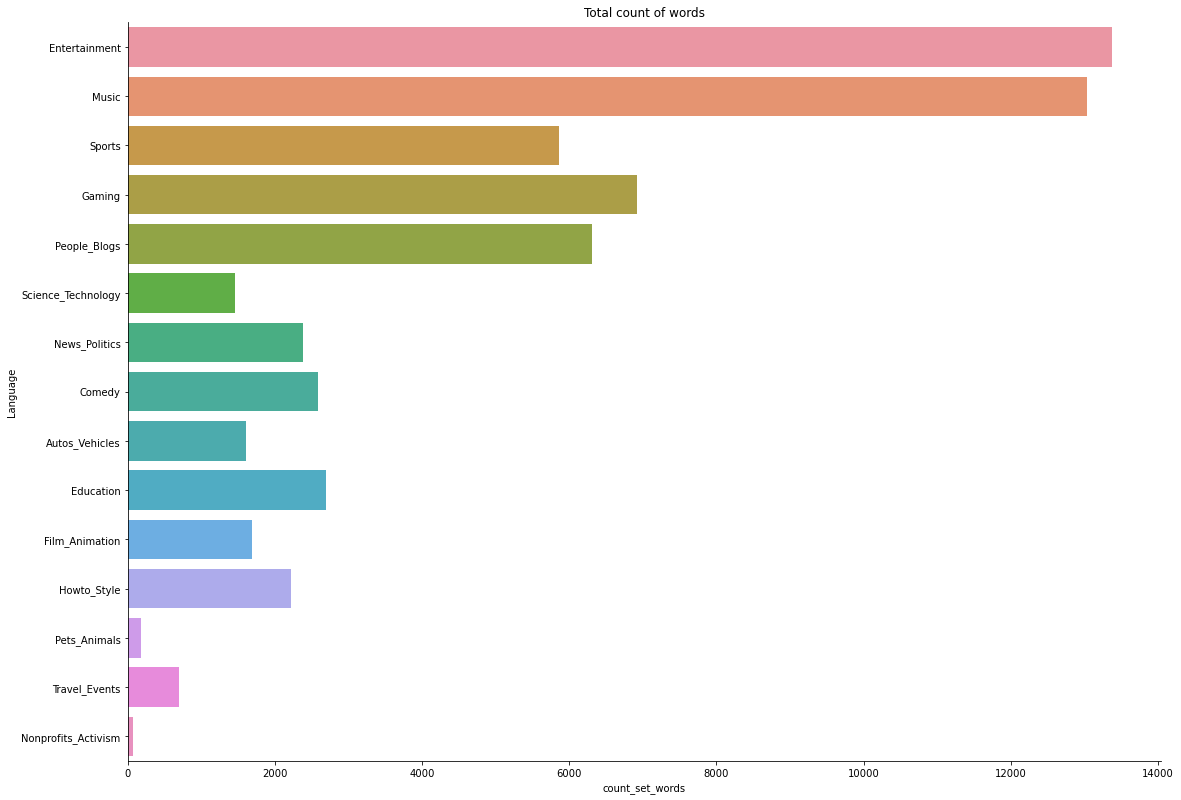

0     13375
1     13032
2      5858
3      6920
4      6313
5      1464
6      2387
7      2586
8      1612
9      2695
10     1690
11     2221
12      179
13      703
14       71
Name: count_set_words, dtype: int64


In [19]:
word_count(train)

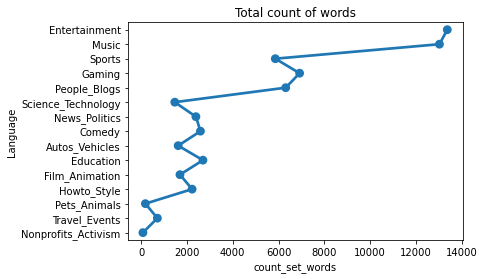

In [20]:
word_count2(train)

# Takeaways:
    
- Entertainment has the highest word count while music is second

- Lowest word count is nonprofit but has the highest engament


# `Hypotheses6:`Are some region more active then others??? for example likes/views

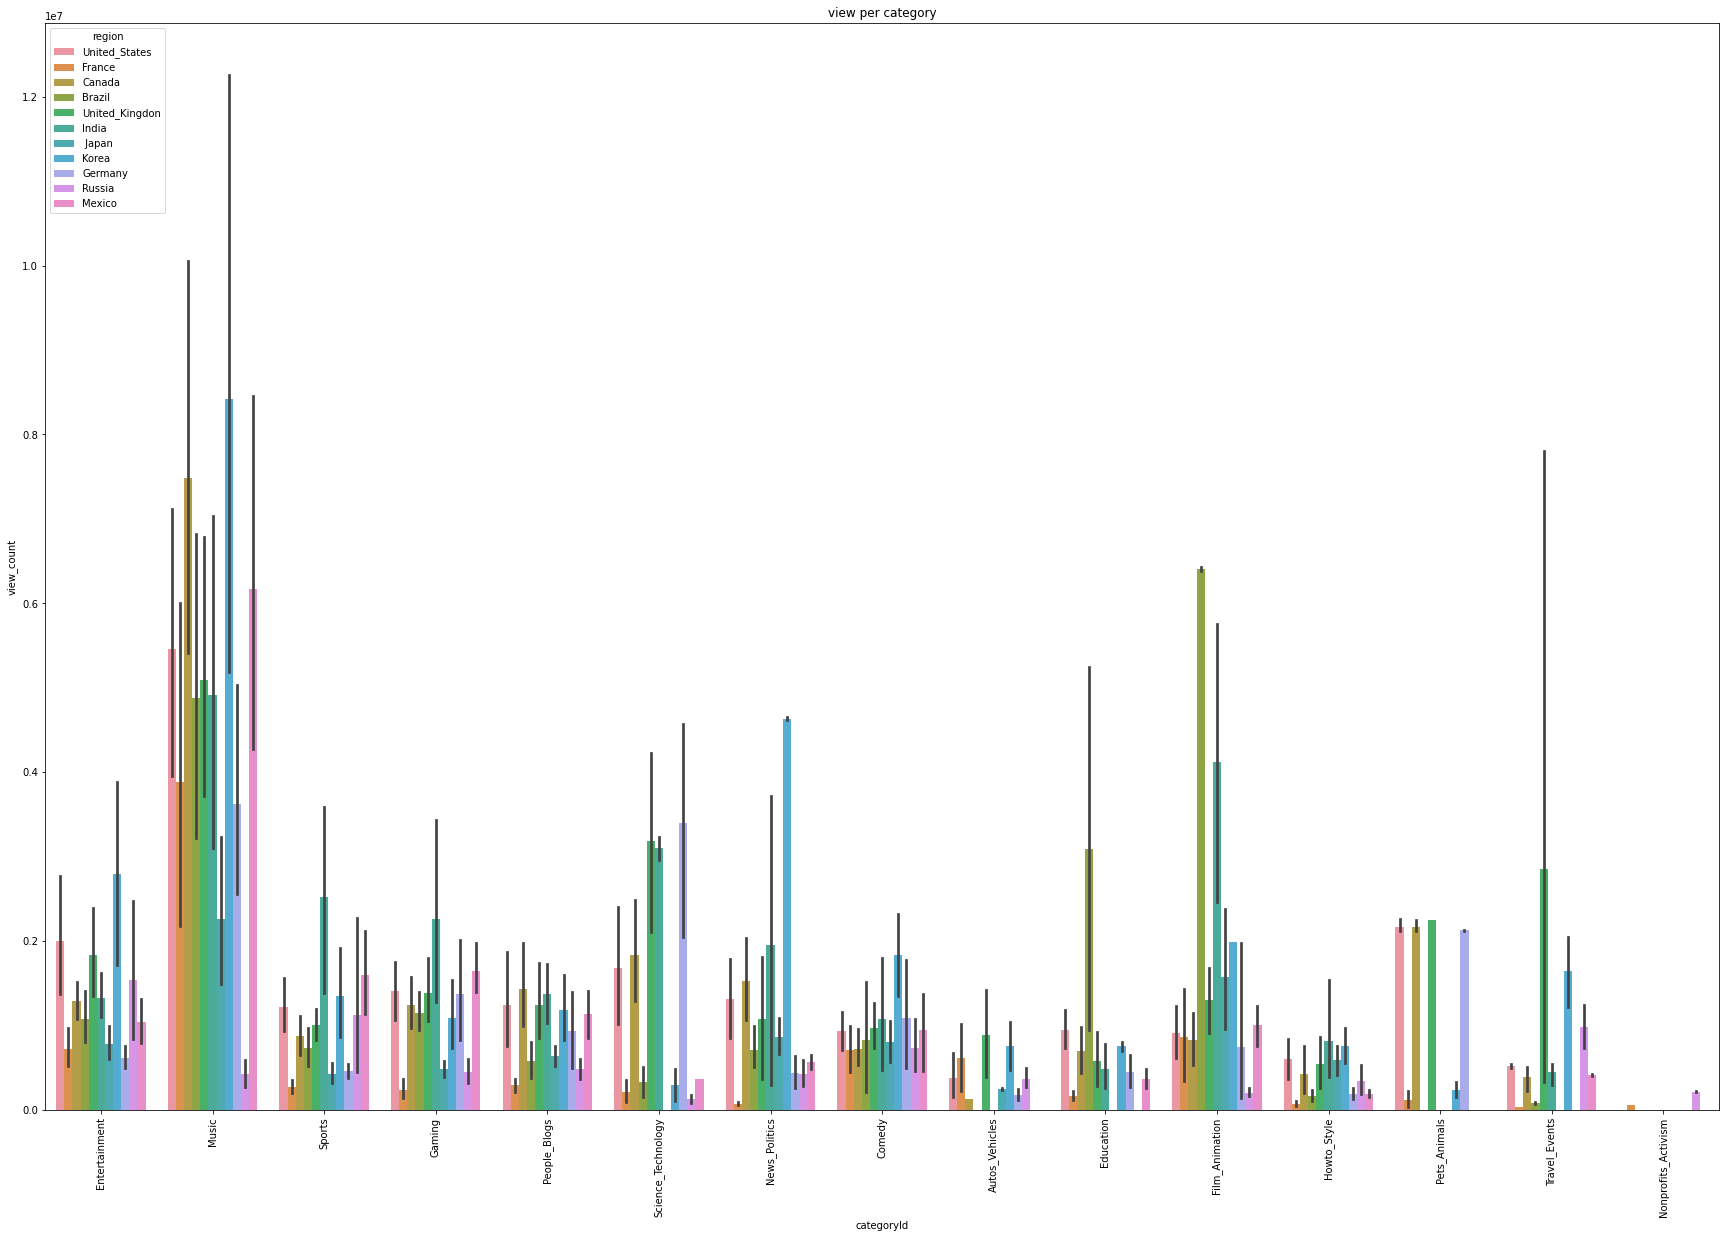

In [21]:
region_category(train)

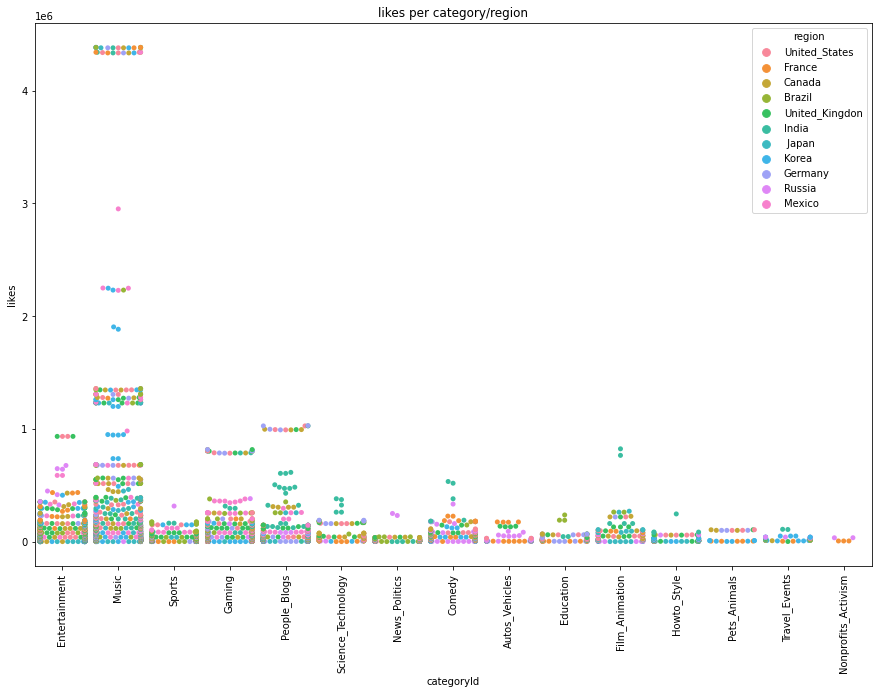

In [22]:
region_category2(train)

# Takeaways:
- All videos went viral on nov1,2022 
- Most video went viral after 2 days
- One video went viral on Oct3,2022

# 4)Modeling:


# Takeaways:
    
- 

- 

- 

# 5)Best Modeling: